In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('happiness_data.csv')

In [3]:
pd.pandas.set_option('display.max_columns',None)

In [4]:
#Shape of dataset
df.shape

(1949, 11)

In [6]:
df.head(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [5]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Log GDP per capita 0.0185  % missing values
Social support 0.0067  % missing values
Healthy life expectancy at birth 0.0282  % missing values
Freedom to make life choices 0.0164  % missing values
Generosity 0.0457  % missing values
Perceptions of corruption 0.0564  % missing values
Positive affect 0.0113  % missing values
Negative affect 0.0082  % missing values


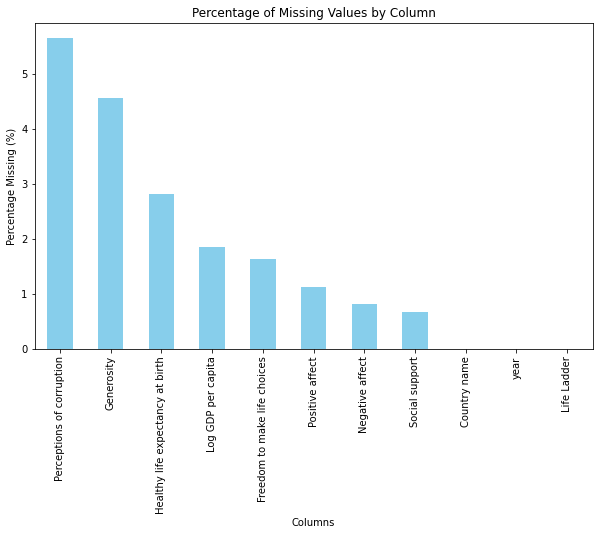

In [20]:
missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.xticks(rotation=90)
plt.show()

Since there are many missing value let us find relationship between missing values and target variable

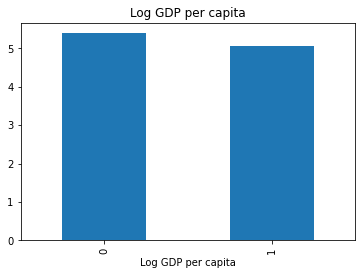

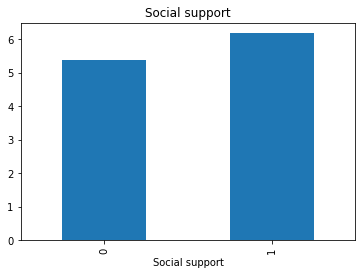

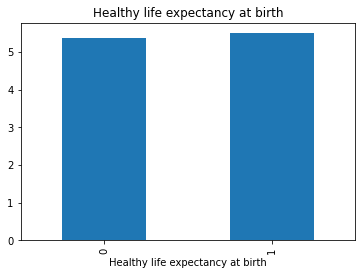

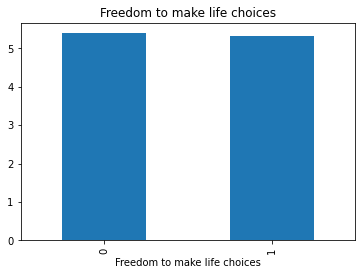

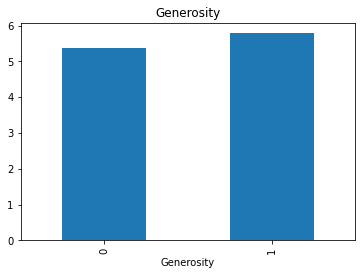

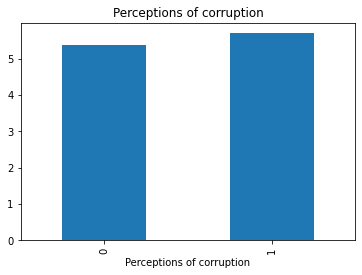

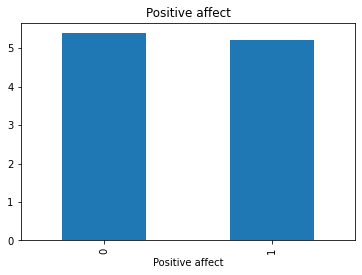

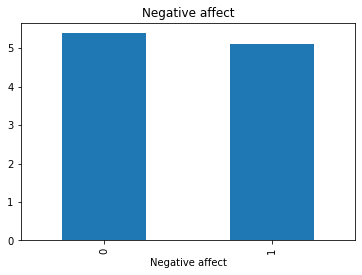

In [7]:
for feature in features_with_na:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['Life Ladder'].median().plot.bar()
    plt.title(feature)
    plt.show()

The above graphs show that missing values do affect the target columns so we will try to impute the missing values in the feature Engineering section

# Numerical Values

In [9]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print(numerical_features)
print('Number of numerical variables: ', len(numerical_features))
df[numerical_features].head()

['year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
Number of numerical variables:  10


,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [11]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print(discrete_feature)
print("Discrete Variables Count: {}".format(len(discrete_feature)))

['year']
Discrete Variables Count: 1


We can ignore the discrete Year column and we can see the distribution of continuous values

In [14]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print(continuous_feature)
print("Continuous feature Count {}".format(len(continuous_feature)))

['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
Continuous feature Count 9


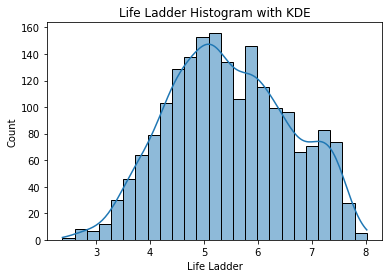

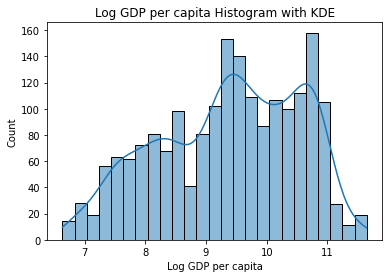

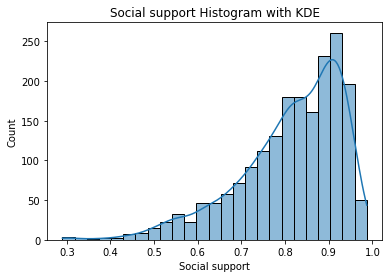

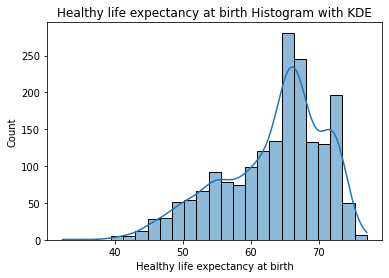

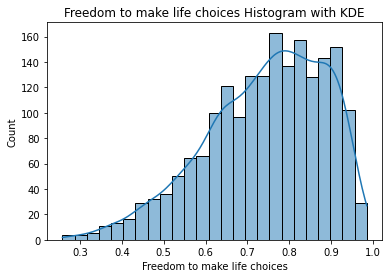

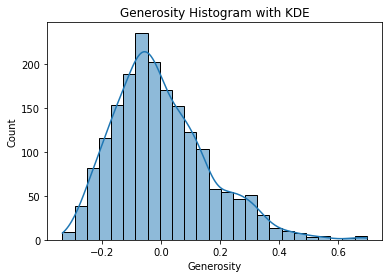

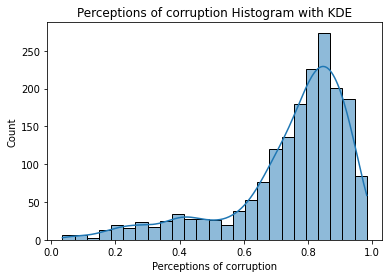

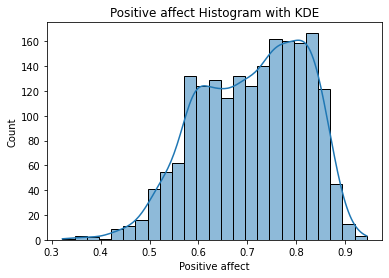

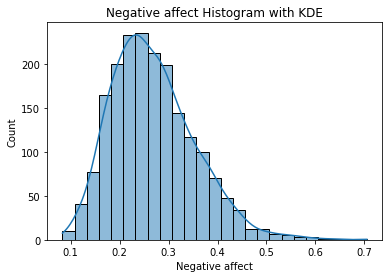

In [16]:
## Lets analyse the continuous values by creating histograms to understand the distribution
for feature in continuous_feature:
    data = df.copy()
    sns.histplot(data=data, x=feature, kde=True, bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f'{feature} Histogram with KDE')
    
    # Show the plot
    plt.show()

# Logarithmic Transformation

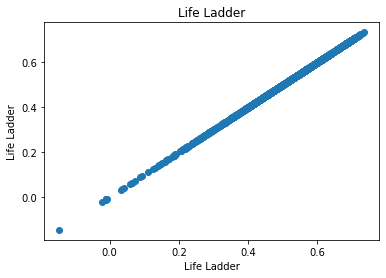

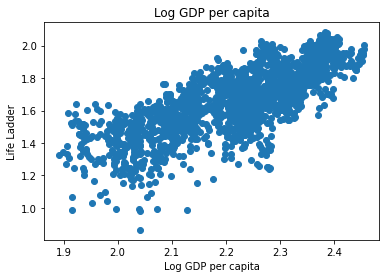

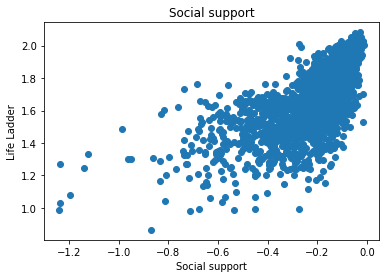

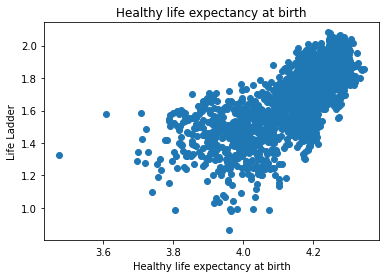

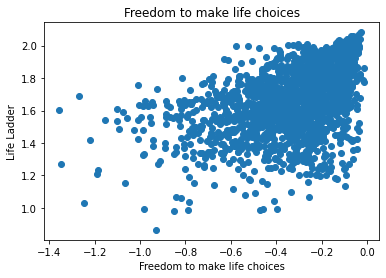

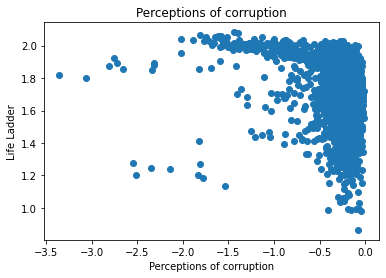

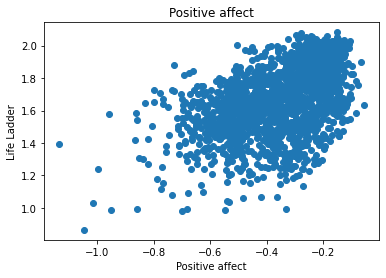

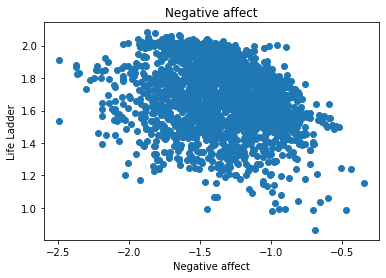

In [18]:

for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Life Ladder']=np.log(data['Life Ladder'])
        plt.scatter(data[feature],data['Life Ladder'])
        plt.xlabel(feature)
        plt.ylabel('Life Ladder')
        plt.title(feature)
        plt.show()

# Checking for Outliers

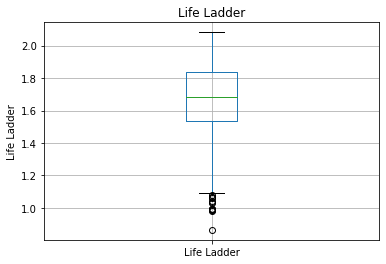

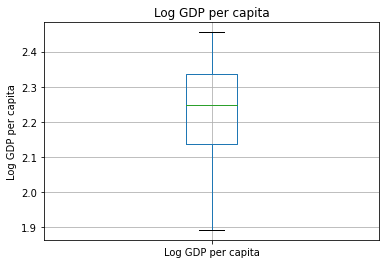

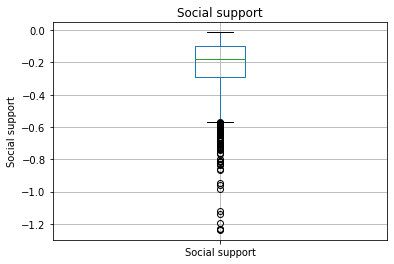

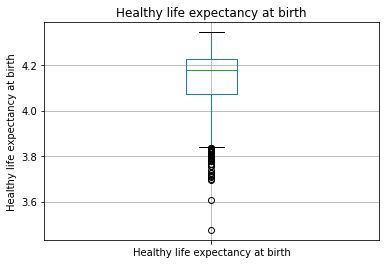

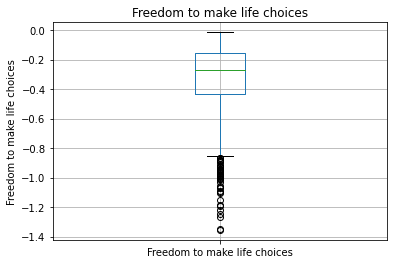

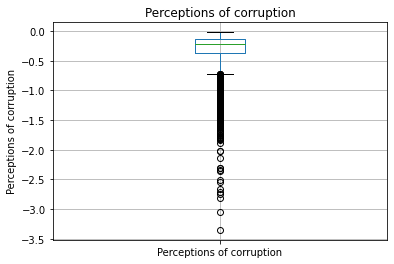

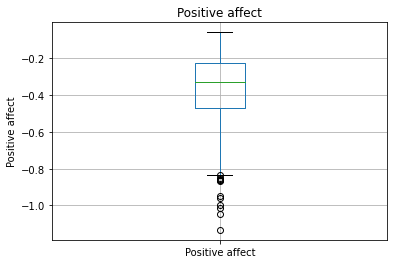

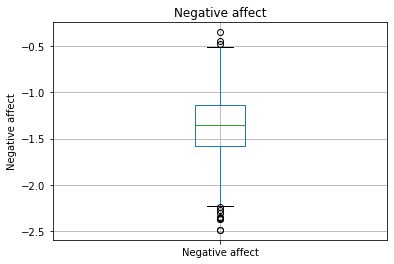

In [19]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Correlation Matrix

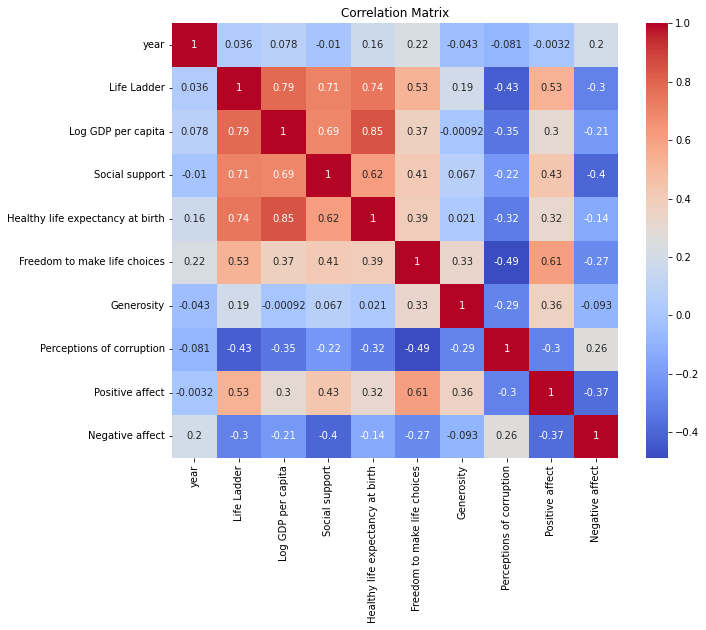

In [21]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [22]:
#Life Ladder top 10 and bottom 10
mean_life_ladder = df.groupby('Country name')['Life Ladder'].mean()
top_10_high_life_ladder = mean_life_ladder.nlargest(10)
bottom_10_low_life_ladder = mean_life_ladder.nsmallest(10)
print("Top 10 countries with highest mean life ladder:")
print(top_10_high_life_ladder)
print("\nBottom 10 countries with lowest mean life ladder:")
print(bottom_10_low_life_ladder)

Top 10 countries with highest mean life ladder:
Country name
Denmark        7.680400
Finland        7.597154
Switzerland    7.548300
Norway         7.512400
Netherlands    7.466286
Iceland        7.446500
Canada         7.376333
Sweden         7.369467
New Zealand    7.310286
Australia      7.282071
Name: Life Ladder, dtype: float64

Bottom 10 countries with lowest mean life ladder:
Country name
South Sudan                 3.402000
Central African Republic    3.515000
Burundi                     3.548200
Togo                        3.555000
Afghanistan                 3.594667
Rwanda                      3.654417
Tanzania                    3.697333
Zimbabwe                    3.882600
Yemen                       3.912250
Comoros                     3.944000
Name: Life Ladder, dtype: float64


# Happiness biggest Increase and decrease

In [23]:
df['year'] = pd.to_numeric(df['year'])
happiness_change = df.groupby('Country name')['Life Ladder'].last() - df.groupby('Country name')['Life Ladder'].first()
countries_with_increase = happiness_change[happiness_change > 0]
countries_with_decrease = happiness_change[happiness_change < 0]
print("Countries with happiness increase:")
print(countries_with_increase.nlargest(10))
print("\nCountries with happiness decrease:")
print(countries_with_decrease.nsmallest(10))

Countries with happiness increase:
Country name
Bulgaria               1.754
Nicaragua              1.653
Kyrgyzstan             1.609
Latvia                 1.519
Georgia                1.448
Liberia                1.420
Mongolia               1.402
Congo (Brazzaville)    1.393
Cameroon               1.390
Serbia                 1.292
Name: Life Ladder, dtype: float64

Countries with happiness decrease:
Country name
Venezuela      -2.596
Jordan         -2.201
Syria          -1.861
Angola         -1.794
Lebanon        -1.467
Lesotho        -1.386
Afghanistan    -1.349
Botswana       -1.268
India          -1.123
Turkmenistan   -1.094
Name: Life Ladder, dtype: float64


# Categorical variables

In [26]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

['Country name']

# Filling Missing Values

In [28]:
df['Generosity'] = df.groupby('Country name')['Generosity'].transform(lambda x: x.fillna(x.mean()))
df['Freedom to make life choices'] = df.groupby('Country name')['Freedom to make life choices'].transform(lambda x: x.fillna(x.mean()))
df['Perceptions of corruption'] = df.groupby('Country name')['Perceptions of corruption'].transform(lambda x: x.fillna(x.mean()))
df['Positive affect']=df.groupby('Country name')['Positive affect'].transform(lambda x: x.fillna(x.mean()))
df['Negative affect']=df.groupby('Country name')['Negative affect'].transform(lambda x: x.fillna(x.mean()))
df['Healthy life expectancy at birth']=df.groupby('Country name')['Healthy life expectancy at birth'].transform(lambda x: x.fillna(x.mean()))
df['Log GDP per capita']=df.groupby('Country name')['Log GDP per capita'].transform(lambda x: x.fillna(x.mean()))
df['Social support']=df.groupby('Country name')['Social support'].transform(lambda x: x.fillna(x.mean()))


In [29]:
df.dropna(inplace=True)

In [30]:
df.isnull().mean()*100

Country name                        0.0
year                                0.0
Life Ladder                         0.0
Log GDP per capita                  0.0
Social support                      0.0
Healthy life expectancy at birth    0.0
Freedom to make life choices        0.0
Generosity                          0.0
Perceptions of corruption           0.0
Positive affect                     0.0
Negative affect                     0.0
dtype: float64

# Feature Engineering

# Studying cause and effect of most correlated variables

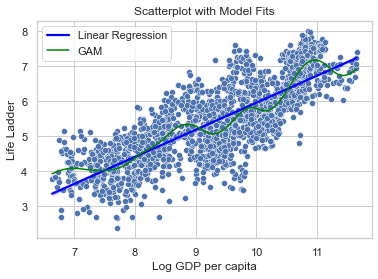

In [31]:
#Studying the cause effect of life ladder and Log GDP per capita
import seaborn as sns
import matplotlib.pyplot as plt
from pygam import LinearGAM

# Scatterplot
sns.set(style="whitegrid")
sns.scatterplot(x="Log GDP per capita", y="Life Ladder", data=df)

# Linear Regression
sns.regplot(x="Log GDP per capita", y="Life Ladder", data=df, scatter=False, color='blue', label='Linear Regression')

X = df[['Log GDP per capita']]
y = df['Life Ladder']
gam = LinearGAM().fit(X, y)
X_grid = gam.generate_X_grid(term=0)
y_pred = gam.predict(X_grid)
plt.plot(X_grid, y_pred, color='green', label='GAM')

plt.legend()
plt.xlabel('Log GDP per capita')
plt.ylabel('Life Ladder')
plt.title('Scatterplot with Model Fits')
plt.show()



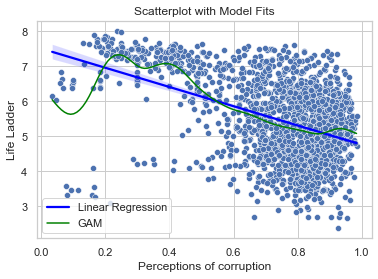

In [32]:
#Studying the cause effect of life ladder and Perceptions of corruptions
import seaborn as sns
import matplotlib.pyplot as plt
from pygam import LinearGAM

# Scatterplot
sns.set(style="whitegrid")
sns.scatterplot(x="Perceptions of corruption", y="Life Ladder", data=df)

# Linear Regression
sns.regplot(x="Perceptions of corruption", y="Life Ladder", data=df, scatter=False, color='blue', label='Linear Regression')

X = df[['Perceptions of corruption']]
y = df['Life Ladder']
gam = LinearGAM().fit(X, y)
X_grid = gam.generate_X_grid(term=0)
y_pred = gam.predict(X_grid)
plt.plot(X_grid, y_pred, color='green', label='GAM')

plt.legend()
plt.xlabel('Perceptions of corruption')
plt.ylabel('Life Ladder')
plt.title('Scatterplot with Model Fits')
plt.show()

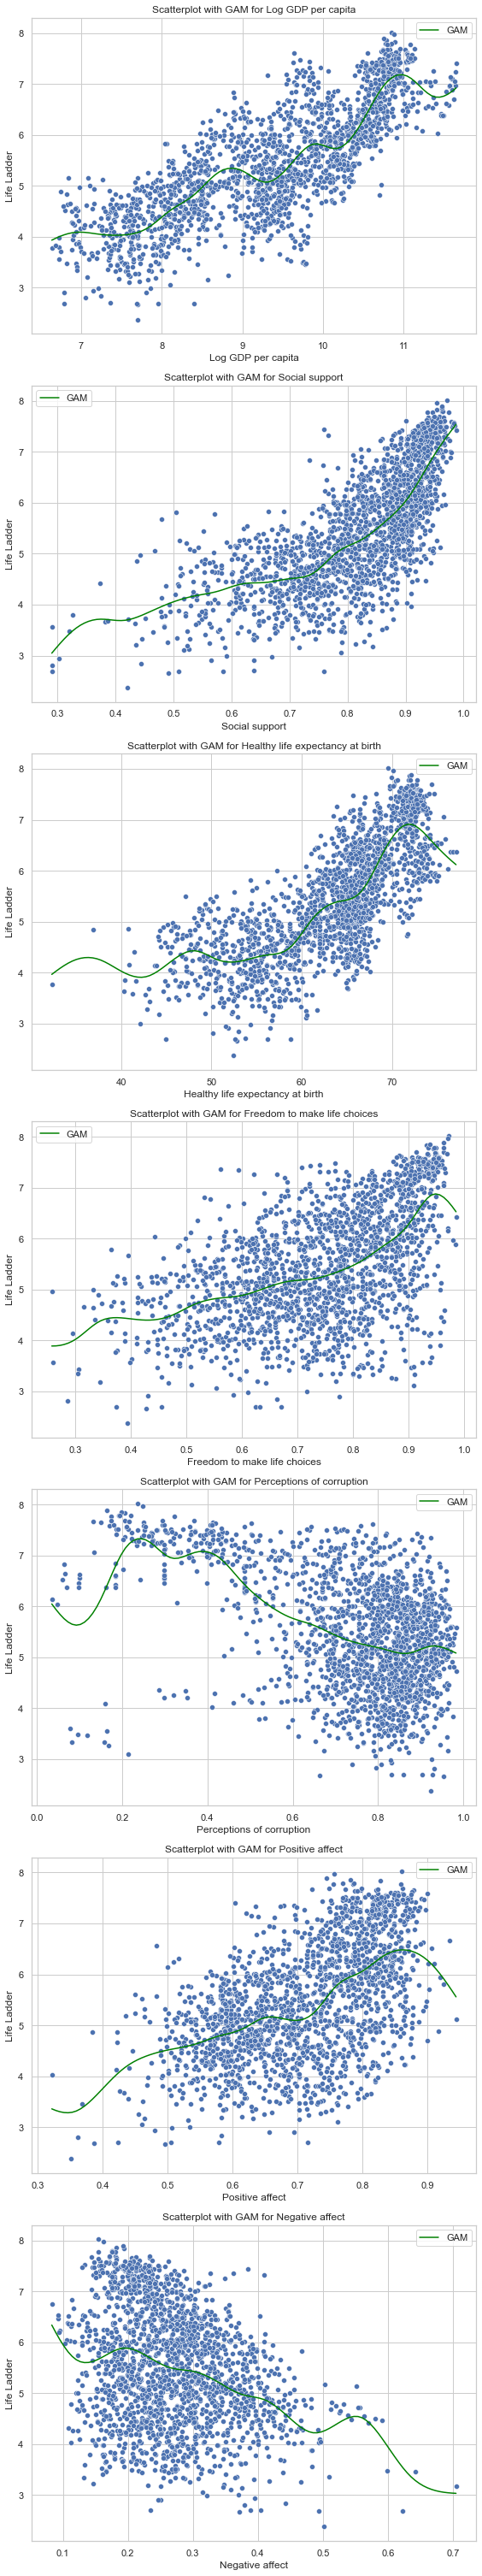

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pygam import LinearGAM

# Assuming you have already loaded your dataset into df

correlation_matrix = df.corr()
pcc_with_label = correlation_matrix['Life Ladder'].drop('Life Ladder')  
significant_attributes = pcc_with_label[abs(pcc_with_label) > 0.2]  

fig, axes = plt.subplots(nrows=len(significant_attributes), ncols=1, figsize=(8, 6 * len(significant_attributes)))

for i, attr in enumerate(significant_attributes.index):
    sns.scatterplot(data=df, x=attr, y='Life Ladder', ax=axes[i])
    X = df[[attr]]
    y = df['Life Ladder']
    gam = LinearGAM().fit(X, y)
    X_grid = gam.generate_X_grid(term=0)
    y_pred = gam.predict(X_grid)
    axes[i].plot(X_grid, y_pred, color='green', label='GAM')
    
    axes[i].legend()
    axes[i].set_xlabel(attr)
    axes[i].set_ylabel('Life Ladder')
    axes[i].set_title(f'Scatterplot with GAM for {attr}')
   
plt.tight_layout()
plt.show()


In [35]:
df.shape

(1878, 11)

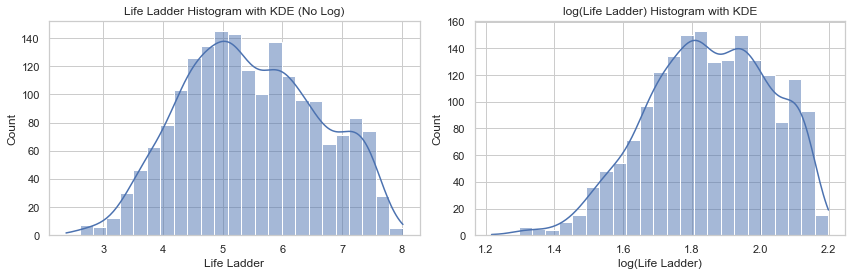

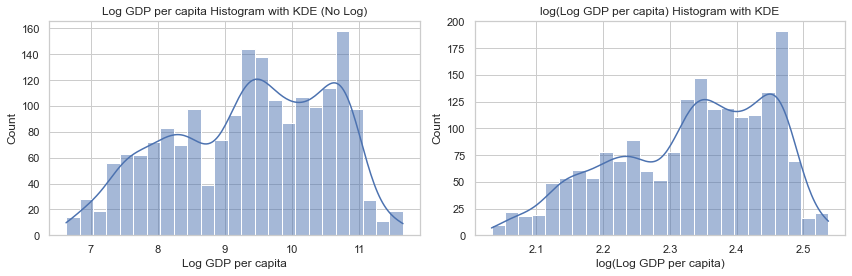

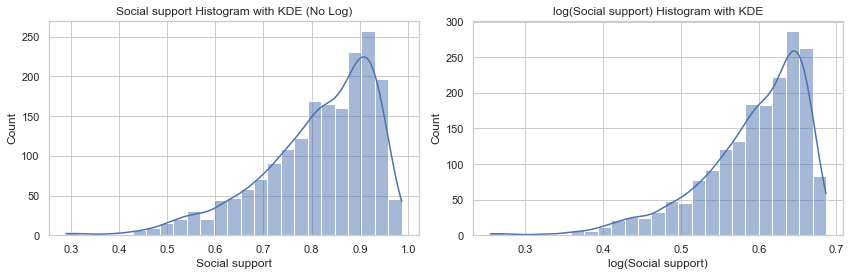

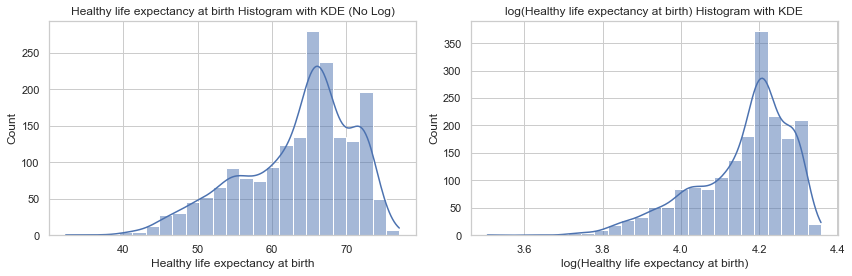

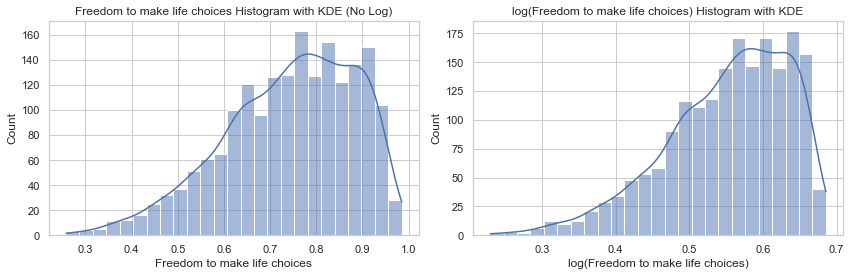

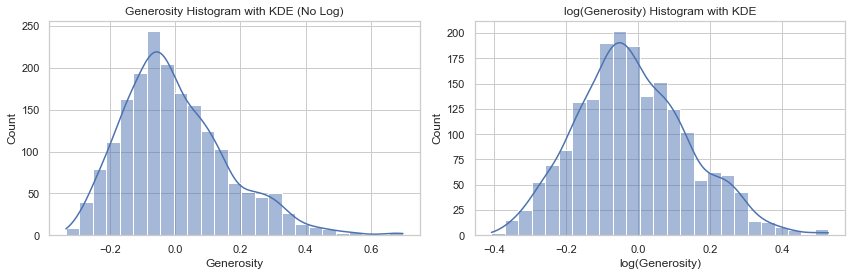

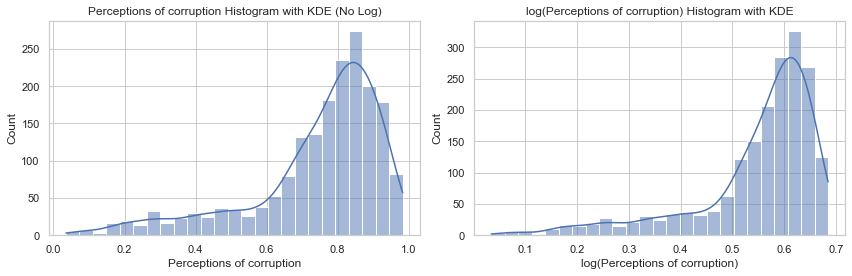

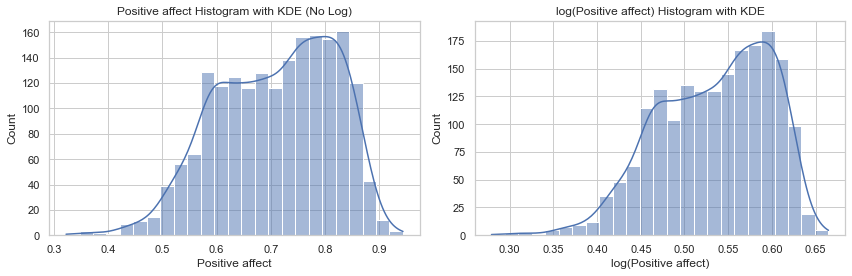

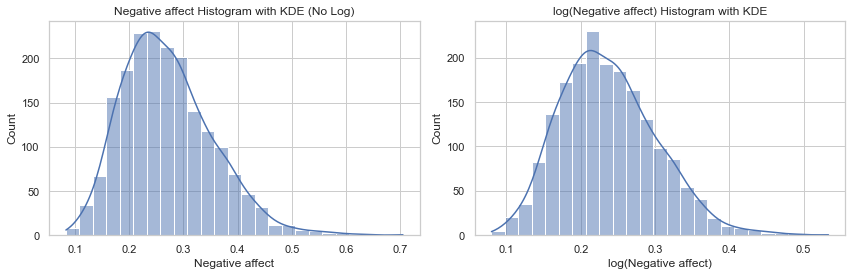

In [38]:
import numpy as np

for feature in continuous_feature:
    data = df.copy()
    
    # Plot the histogram without log transformation
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data=data, x=feature, kde=True, bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f'{feature} Histogram with KDE (No Log)')
    
    # Plot the histogram with log transformation
    plt.subplot(1, 2, 2)
    data[feature] = np.log1p(data[feature])
    sns.histplot(data=data, x=feature, kde=True, bins=25)
    plt.xlabel(f'log({feature})')
    plt.ylabel("Count")
    plt.title(f'log({feature}) Histogram with KDE')
    
    # Show the plots side by side
    plt.tight_layout()
    plt.show()
